In [14]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("UniversalBank.csv")
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: >

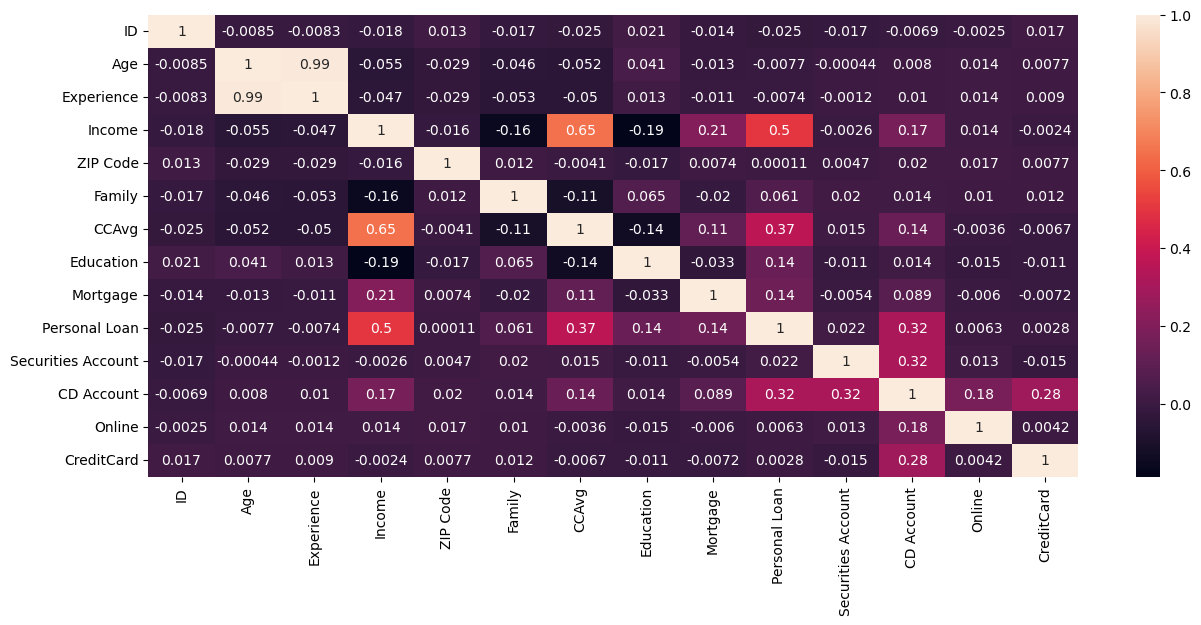

In [18]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot= True)

In [20]:
corr_df = df.corr()
feat_selectiiondf = (abs(corr_df["CreditCard"]) > 0.01)
feat_selectiiondf = pd.DataFrame(data= feat_selectiiondf)
selectd_Features = feat_selectiiondf[feat_selectiiondf.CreditCard == True].index
#After features Enginering
claned_df = df.loc[:, selectd_Features]
from sklearn.model_selection import train_test_split
X = claned_df.iloc[:,:-1]
Y = claned_df["CreditCard"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle= True)

In [138]:
dt = DecisionTreeClassifier(criterion='entropy',
    splitter='random',
    max_depth=100,
    min_samples_split=1.0,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None)

In [140]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100,
                       min_samples_split=1.0, splitter='random')

In [142]:
y_predict = dt.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score

In [146]:
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.752
